In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from numpy.fft import rfft, fft, ifft, fftfreq
import IPython.display as ipd

# Task 1: DCT + iDCT

In [3]:
"""Return the DCT basis matrix of size n x n."""
def get_dct_basis(n):
    basis = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == 0:
                basis[i, j] = 1 / np.sqrt(n)
            else:
                basis[i, j] = np.sqrt(2 / n) * np.cos((np.pi * (2 * j + 1) * i) / (2 * n))
    return basis

In [4]:
# Discrete cosine transform and inverse one

# Did I really need to implement those myself?
def dct(x):
    N = len(x)
    A = get_dct_basis(N)
    Y = np.zeros(len(x))
    for i in range(int(len(x) / N)):
        Y[i * N: (i + 1) * N] = A @ x[i * N: (i + 1) * N].T
    return Y

def dct_inv(Y):
    N = len(Y)
    A = get_dct_basis(N)
    x = np.zeros(len(Y))
    for i in range(int(len(Y) / N)):
        x[i * N: (i + 1) * N] = get_dct_basis(N).T @ Y[i * N: (i + 1) * N].T
    return x

[-3.03075573e+00+0.00000000e+00j  7.76146858e-01-5.01668317e+02j
 -3.76081774e-01-3.59363371e-01j -2.13085345e-01+3.08371353e+00j
 -2.57715979e+00-8.32810167e-01j  5.12782057e+00+1.56734501e+00j
  1.27430577e+00+2.75694423e+00j  6.83498590e-01-7.69950058e-01j
  3.99078999e+00-8.30711883e-01j -3.66137454e+00+4.49232555e+00j
 -1.78259279e-02-8.40321470e-01j -4.68349692e+00+1.83107805e+00j
 -4.87179309e+00-5.92695424e+00j  4.41955381e-01-1.36235476e-02j
  2.65404016e-01+1.45817828e-01j -8.36135342e-01-7.96098345e-01j
  2.20437756e+00+7.30907067e-01j -3.79624497e-01+3.45458722e-01j
  3.23009214e+00+1.22117284e+00j -3.38397753e+00+5.65871415e-01j
 -4.60028839e-01+4.63327309e-01j  2.25502109e+00-1.51745425e+00j
  2.86425614e+00-6.41771697e-01j -6.25056137e-01-1.74036111e+00j
 -9.60762358e-01-1.32267043e+00j  1.03187684e+00+1.52968327e+00j
 -1.25954433e+00+2.83832799e+00j  1.92008005e+00-8.30125520e-01j
 -1.80918338e+00+2.49701536e+00j -5.54335511e-01-5.99565548e-02j
  4.21799911e-01-3.257598

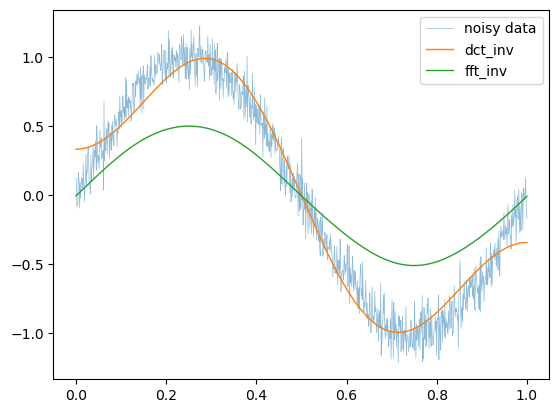

In [12]:
# generate noisy 1D data
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, 1000)

Y = dct(y) # forward DCT
Y[5:] = 0 # Nullify all but the first 5 cosines
y2 = dct_inv(Y) # inverse DCT

spct = fft(y)
print(spct)
spct[5:] = 0
y3 = ifft(spct)

fig, ax = plt.subplots()

plt.plot(x, y, linewidth=0.5, label='noisy data', alpha=0.5)
plt.plot(x, y2, linewidth=1, label='dct_inv')
plt.plot(x, y3, linewidth=1, label='fft_inv')

ax.legend()

plt.show()

# Task 2: DFT/FFT

In [ ]:
# do i need to implement this as well?
def dft(x, k):
    re = 0.0
    im = 0.0
    N = len(x)
    for n in range(N):
        re += x[n] * np.cos(2 * np.pi * k * n / N)
        im -= x[n] * np.sin(2 * np.pi * k * n / N)
    return re, im

def idft(x, k):
    re = 0.0
    im = 0.0
    N = len(x)
    for n in range(N):
        re += x[n] * np.cos(2 * np.pi * k * n / N)
        im += x[n] * np.sin(2 * np.pi * k * n / N)
    return re / N, im / N

In [ ]:
sr, data = sp.io.wavfile.read("assets/hello.wav")
ipd.Audio(data, rate=sr)

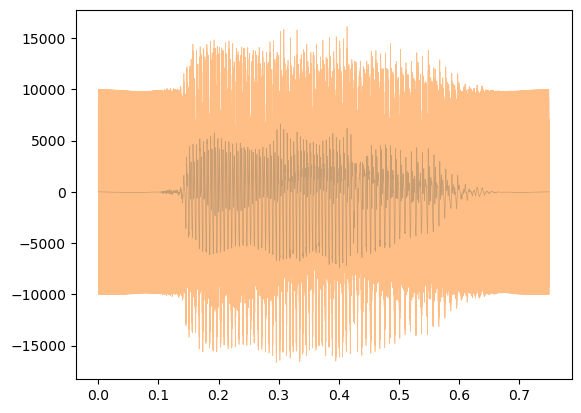

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(0, len(data) / sr, len(data))
tone_freq = 5000
noise = 10000 * np.sin(2 * np.pi * tone_freq * x)
spoiled_data = data + noise

plt.plot(x, data, linewidth=0.5, label='Original data', alpha=0.5)
plt.plot(x, spoiled_data, linewidth=0.5, label='Original data', alpha=0.5)
ipd.display(ipd.Audio(data, rate=sr))
ipd.display(ipd.Audio(spoiled_data, rate=sr))

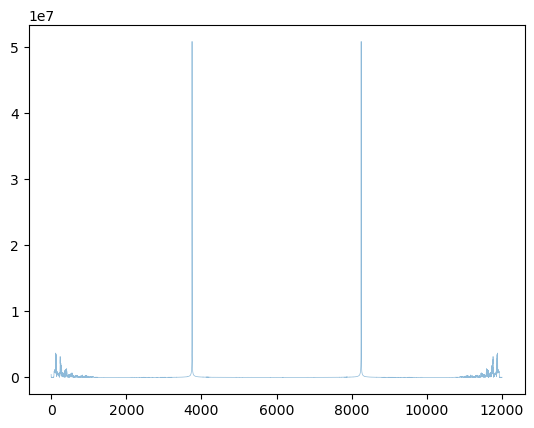

In [ ]:
spectrum = fft(spoiled_data)

plt.plot(np.abs(spectrum), linewidth=0.5, label='Original data', alpha=0.5)

In [ ]:
np.max(np.abs(spectrum))

50812066.77236053

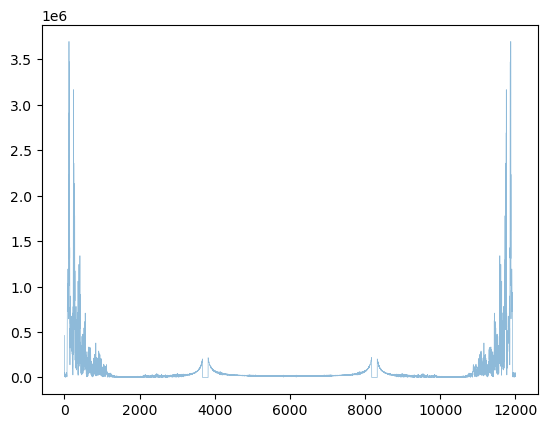

In [ ]:
filtered_spectrum = spectrum.copy()

# remove highest frequencies

for i in range((tone_freq - 100) * len(data) // sr, (tone_freq + 100) * len(data) // sr):
    filtered_spectrum[i] = 0
    filtered_spectrum[-i] = 0

filtered_data = ifft(filtered_spectrum)

plt.plot(np.abs(filtered_spectrum), linewidth=0.5, label='Original data', alpha=0.5)

/Users/m8dotpie/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/m8dotpie/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


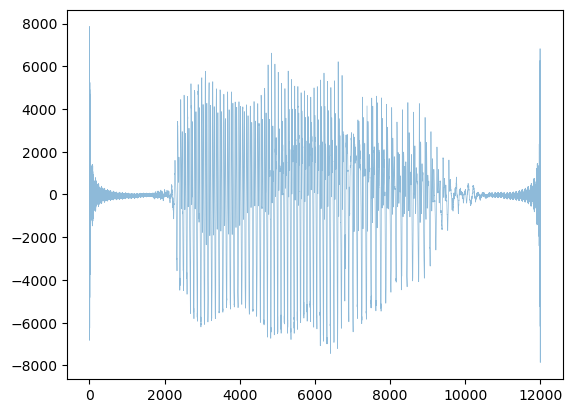

In [ ]:
plt.plot(filtered_data, linewidth=0.5, label='Original data', alpha=0.5)
ipd.Audio(filtered_data, rate=sr)